In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [3]:
pwd = os.getcwd()
path = os.path.join(pwd, 'heart.csv')
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.target = df['target'].map({0:'Positive', 1:'Negative'})
df.target

0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
298    Positive
299    Positive
300    Positive
301    Positive
302    Positive
Name: target, Length: 303, dtype: object

In [6]:
y = df.target
y

0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
298    Positive
299    Positive
300    Positive
301    Positive
302    Positive
Name: target, Length: 303, dtype: object

In [7]:
y.shape

(303,)

In [8]:
X = df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
X.shape

(303, 13)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [11]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

X_train shape: (227, 13)
y_train shape: (227,)


In [12]:
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_test shape: (76, 13)
y_test shape: (76,)


In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [14]:
y_pred

array(['Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positi

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)
y_train_pred

array(['Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [16]:
y_train

287    Positive
282    Positive
197    Positive
158    Negative
164    Negative
         ...   
188    Positive
71     Negative
106    Negative
270    Positive
102    Negative
Name: target, Length: 227, dtype: object

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[99, 25],
       [30, 73]], dtype=int64)

<AxesSubplot:>

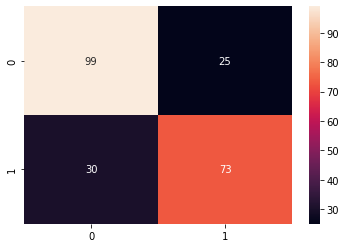

In [18]:
sns.heatmap(conf_matrix, annot = True)

In [19]:
from sklearn.metrics import classification_report

classification_report(y_train, y_train_pred)

'              precision    recall  f1-score   support\n\n    Negative       0.77      0.80      0.78       124\n    Positive       0.74      0.71      0.73       103\n\n    accuracy                           0.76       227\n   macro avg       0.76      0.75      0.75       227\nweighted avg       0.76      0.76      0.76       227\n'

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label='Positive')) 

Precision Score:  0.7448979591836735
